# Project Check-in 4

Create simple diagnostic plots, such as histograms, box plots, and scatter plots to show the relationships between your variables.

Plan what hypothesis tests you will run for your final analysis, and I will provide feedback on them, including what statistical tests would be appropriate.

Types of hypothesis tests:

Is the mean of a variable different (greater/smaller) than some number?
Are the means of two variables different (one bigger than the other)?
Are the means of multiple variables different? 
Can one variable be used to predict another?
Can multiple variables be used to predict another?
Does a value increase, decrease, or stay the same over time?
If you don't think your hypothesis test falls within these groups, let me know, and I will help you come up with an appropriate hypothesis.

This assignment should be submitted as a link to a Jupyter notebook in your project repository.

### Setting Up

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_excel('/Users/gretchenwang/GitHub/group4-project/Cleaned_Data.xlsx')

df['StartDate'] = pd.to_datetime(df['StartDate'], format="%m/%d/%Y")

The above cells are loading in what we'll use in this notebook and converting the dates to a usable value for the figures. Cleaned_Data.xlsx is the exported form of the processed data. I've also corrected some mistakes in the previous processing (i.e. the accidental exclusion of Phosphorus from the processed data). Those changes can be seen in Project Check-in 3.

In [41]:
nitrogen = df.loc[df['DWM_Name']== 'Total Nitrogen']

nitrate_nitrite = df.loc[df['DWM_Name']== 'Nitrate/Nitrite-N']

ammonia = df.loc[df['DWM_Name']== 'Ammonia-N']

phosphorus = df.loc[df['DWM_Name']== 'Total Phosphorus']


This creates a subset for each type of nutrient we're analyzing in our project.

### Figures

As our project centers around tracking the change in nutrient levels over time, a line graph is the most appropriate dignostic plot. I decided to group by nutrient and create one panel for each water quality sampling station we've determined relevant to our project. 

In [42]:
# Making  subsets for each region and nutrient

#Nitrogen:
GSouth = nitrogen.loc[nitrogen['Watershed'] == 'South Coastal']
GShawsheen = nitrogen.loc[nitrogen['Watershed'] == 'Shawsheen']
GNeponset = nitrogen.loc[nitrogen['Watershed'] == 'Neponset']
GCharles = nitrogen.loc[nitrogen['Watershed'] == 'Charles']

# Nitrate and Nitrite:
NSouth = nitrate_nitrite.loc[nitrate_nitrite['Watershed'] == 'South Coastal']
NShawsheen = nitrate_nitrite.loc[nitrate_nitrite['Watershed'] == 'Shawsheen']
NNeponset = nitrate_nitrite.loc[nitrate_nitrite['Watershed'] == 'Neponset']
NCharles = nitrate_nitrite.loc[nitrate_nitrite['Watershed'] == 'Charles']

#Ammonia:
ASouth = ammonia.loc[ammonia['Watershed'] == 'South Coastal']
AShawsheen = ammonia.loc[ammonia['Watershed'] == 'Shawsheen']
ANeponset = ammonia.loc[ammonia['Watershed'] == 'Neponset']
ACharles = ammonia.loc[ammonia['Watershed'] == 'Charles']

#Phosphorus
PSouth = phosphorus.loc[phosphorus['Watershed'] == 'South Coastal']
PShawsheen = phosphorus.loc[phosphorus['Watershed'] == 'Shawsheen']
PNeponset = phosphorus.loc[phosphorus['Watershed'] == 'Neponset']
PCharles = phosphorus.loc[phosphorus['Watershed'] == 'Charles']


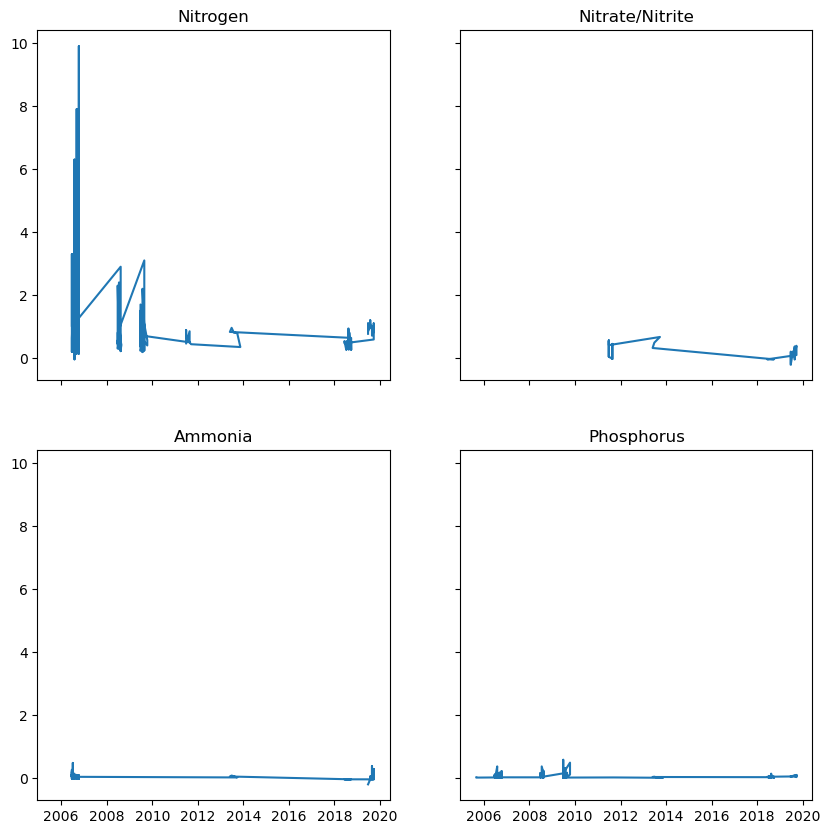

In [48]:
figure, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ax[0,0].plot(GSouth['StartDate'], GSouth['nResult'])
ax[0,0].set_title('Nitrogen')
ax[0,1].plot(NSouth['StartDate'], NSouth['nResult'])
ax[0,1].set_title('Nitrate/Nitrite')
ax[1,0].plot(ASouth['StartDate'], ASouth['nResult'])
ax[1,0].set_title('Ammonia')
ax[1,1].plot(PSouth['StartDate'], PSouth['nResult'])
ax[1,1].set_title('Phosphorus')
plt.show()

Here I display line graphs for each type of nutrient at the South Coastal area. However, there seems to be an issue with samples that were taken on the same day but at different times causing some overlap in the graph.

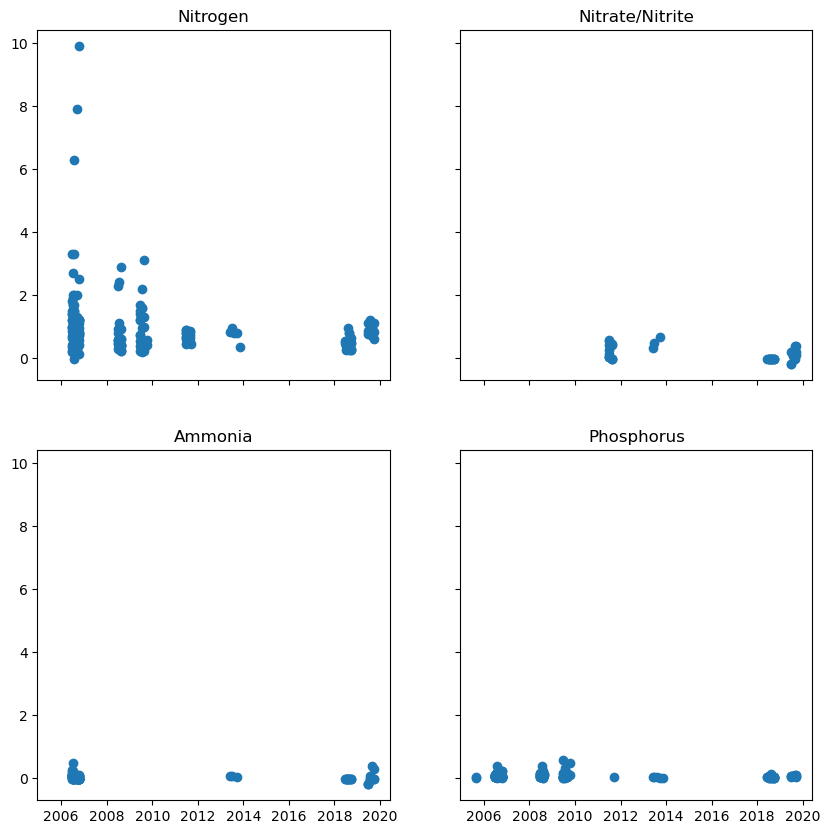

In [49]:
figure, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10)) 
ax[0,0].scatter(GSouth['StartDate'], GSouth['nResult'])
ax[0,0].set_title('Nitrogen')
ax[0,1].scatter(NSouth['StartDate'], NSouth['nResult'])
ax[0,1].set_title('Nitrate/Nitrite')
ax[1,0].scatter(ASouth['StartDate'], ASouth['nResult'])
ax[1,0].set_title('Ammonia')
ax[1,1].scatter(PSouth['StartDate'], PSouth['nResult'])
ax[1,1].set_title('Phosphorus')
plt.show()

Here I try using scatter plots instead to see if eliminating the connected lines would make the data easier to read. it's definitely easier to see each individual data point and where it lies, but the lack of connected lines makes the data look very spaced out and possibly difficult to analyze differences in. The line graphs may be strange-looking, but still fulfill our original intent (to observe the changes in nutrient levels throughout the years), so I've decided to stick with line graphs for now. In the future, if the strange-looking graph is a problem, I may switch to finding the mean of each day's samples and using that as the data point for that day rather than having all of them on the graph. Furthermore, the scatter plots reveal that much of the data, though at the same site, is not taken at the same time. As a result, it might be better if I plot each subset for each site on its own axis. 

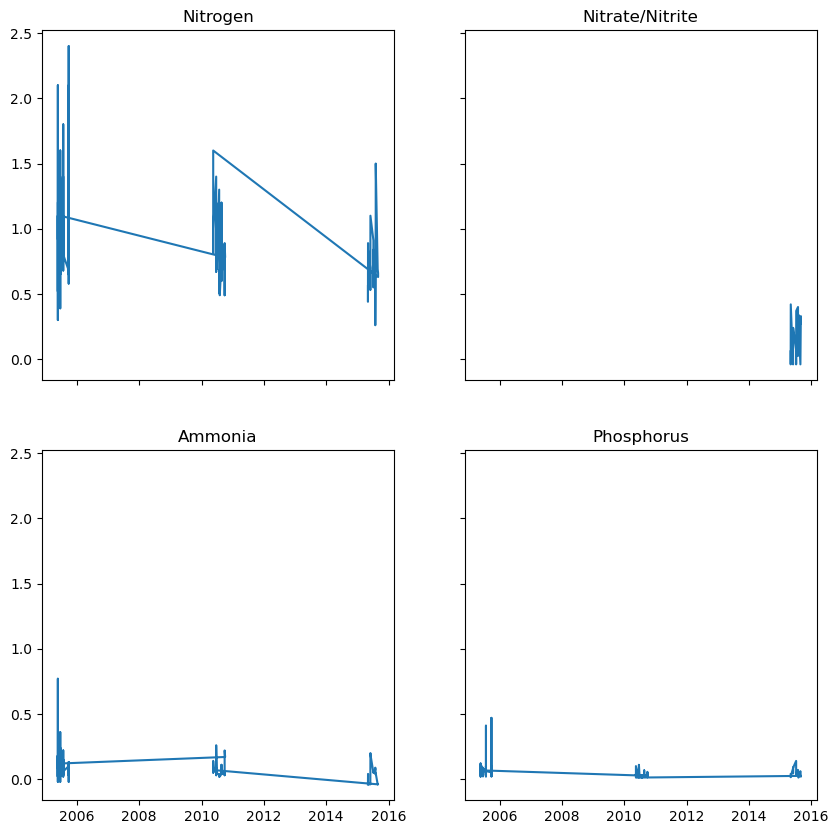

In [71]:
figure, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ax[0,0].plot(GShawsheen['StartDate'], GShawsheen['nResult'])
ax[0,0].set_title('Nitrogen')
ax[0,1].plot(NShawsheen['StartDate'], NShawsheen['nResult'])
ax[0,1].set_title('Nitrate/Nitrite')
ax[1,0].plot(AShawsheen['StartDate'], AShawsheen['nResult'])
ax[1,0].set_title('Ammonia')
ax[1,1].plot(PShawsheen['StartDate'], PShawsheen['nResult'])
ax[1,1].set_title('Phosphorus')
plt.show()

This set of graphs shows the nutrient levels at the Shawsheen site. However, these graphs look even stranger than the South Coastal ones. For these I may have to find and plot the means of each day instead. I may also take each graph out and plot it on its on axis instead, as the dates seem to be rather spread out between each graph. 

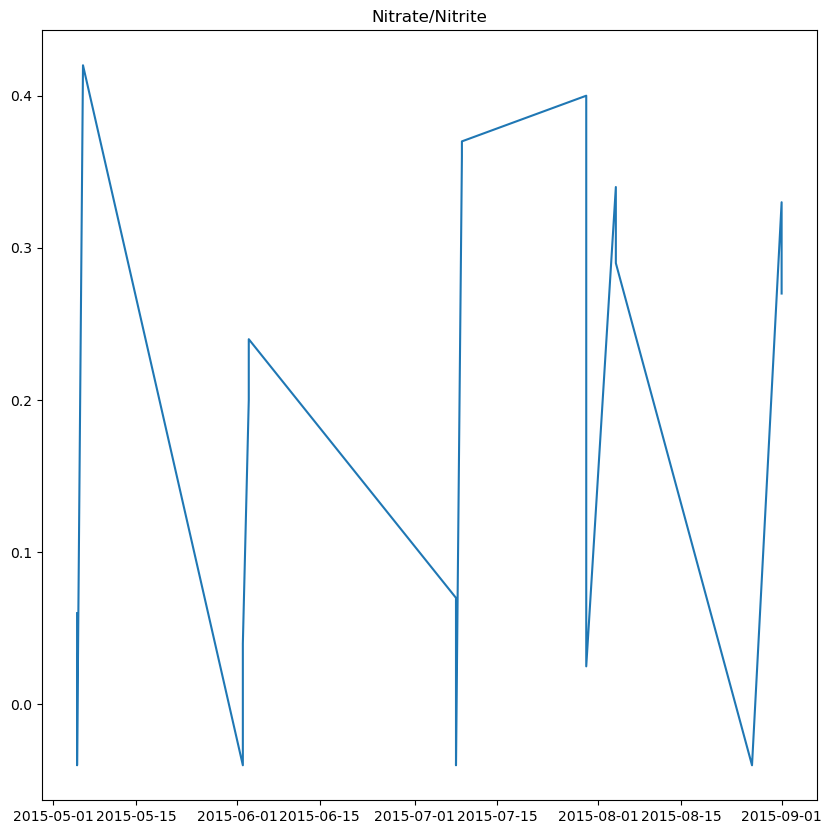

In [60]:
figure, ax = plt.subplots(1, figsize=(10,10))
ax.plot(NShawsheen['StartDate'], NShawsheen['nResult'])
ax.set_title('Nitrate/Nitrite')
plt.show()

Taking the individual subset and plotting it on its own axis illustrates the data a lot clearer, but there are still strange lines due to the same-date sampling. Below, I tried a scatter plot again. 

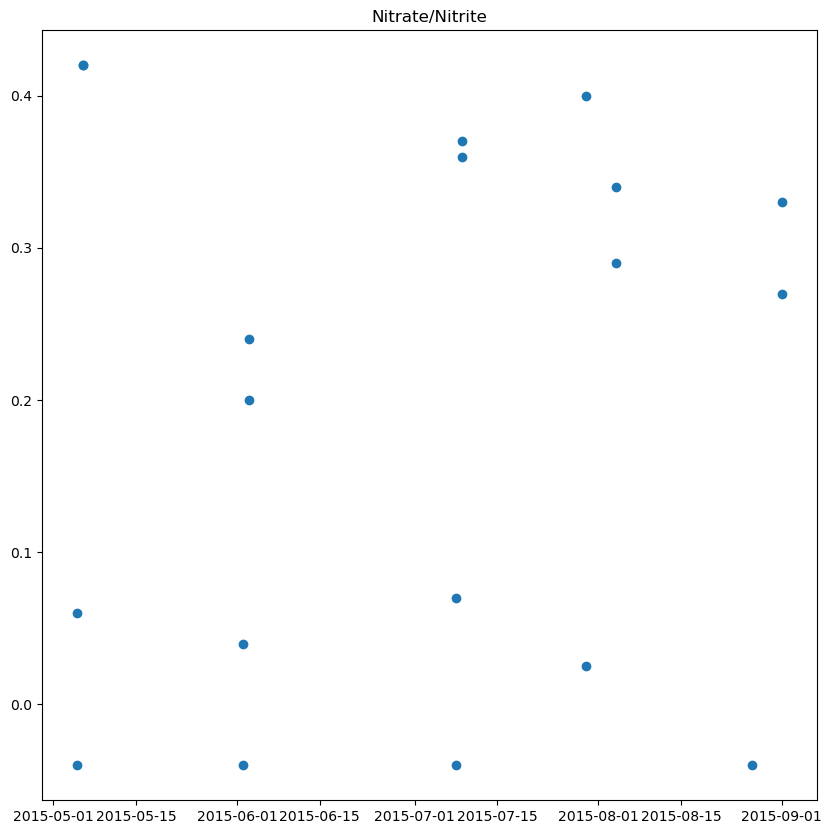

In [61]:
figure, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(NShawsheen['StartDate'], NShawsheen['nResult'])
ax.set_title('Nitrate/Nitrite')
plt.show()

This one has a lot fewer strange lines, but the general idea I'm getting from this plot is that there isn't much change over time. However, this dataset only covers May to September of 2015, so that may be an expected outcome. 

Ultimately, for the purposes of illustrating the general relationship between our variables, I've decided to stick with 2x2 panels of line graphs for each site. Furthermore, as our project is meant to study the overall trend in all kinds of nutrients, I still believe it best to have all the nutrient levels at each site next to each other and on the same axis for easy comparison. In the future, if we require a closer look at any specific nutrient at a specific site, we can return to this notebook and create figures for it. 

# Final Figures and Hypothesis Test

In [83]:
nrow = 2
ncol = 2
# for the purpose of labeling the axes of each graph

def figure(Nitro,Nitra,Am,Ph):
    figure, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
    ax[0,0].plot(Nitro['StartDate'], Nitro['nResult'])
    ax[0,0].set_title('Nitrogen')
    ax[0,1].plot(Nitra['StartDate'], Nitra['nResult'])
    ax[0,1].set_title('Nitrate/Nitrite')
    ax[1,0].plot(Am['StartDate'], Am['nResult'])
    ax[1,0].set_title('Ammonia')
    ax[1,1].plot(Ph['StartDate'], Ph['nResult'])
    ax[1,1].set_title('Phosphorus')
    for i in range(nrow): 
        for j in range(ncol):
            ax[i,j].set_ylabel('Nutrient Levels (mg/L)')
            ax[i,j].set_xlabel('Date')
    return plt.show()

Here I make a function to cut down on lines of code used for generating each figure.

### South Coastal

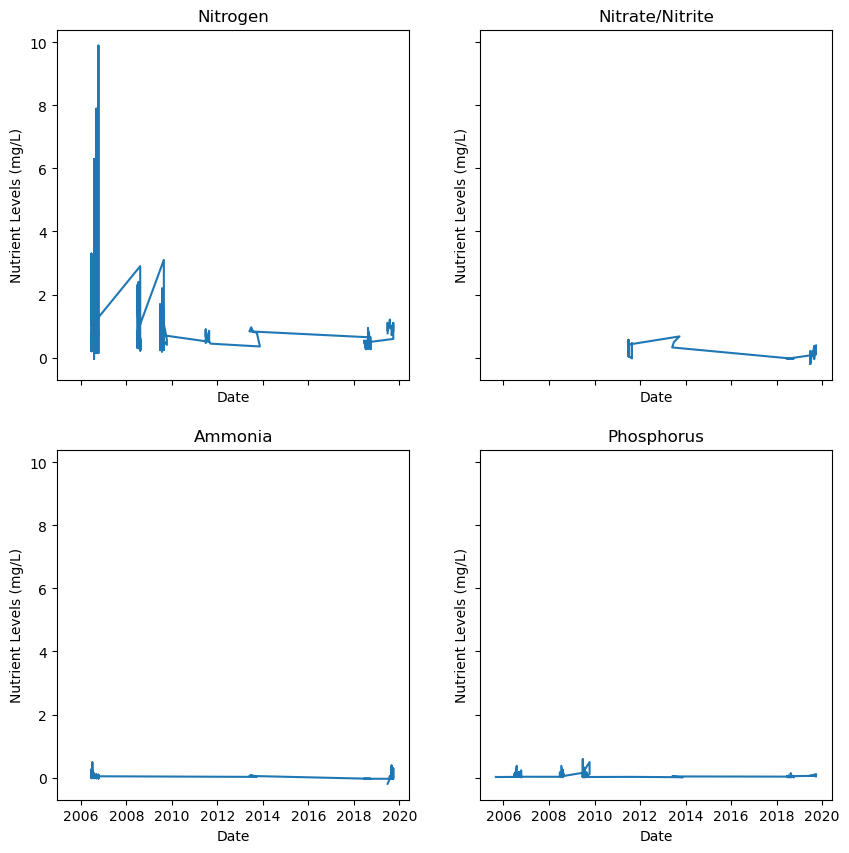

In [82]:
figure(GSouth,NSouth,ASouth,PSouth)

There seems to be not much variation in nutrient levels among all nutrients except Nitrogen, which shows a wide range of nutrient levels in the first couple of years then maintains a steadier low level of nitrogen. This could indicate that there is not a significant change in nutrient levels at the South Coastal sampling site over time, though this could do with the location of the watershed. We will know more when we plot each sampling site and urban farm on a map of the local waterways. It's worth nothing, too, that there seems to be several outliers in the nitrogen dataset that make the range of the y-axis go up to 10.

### Shawsheen

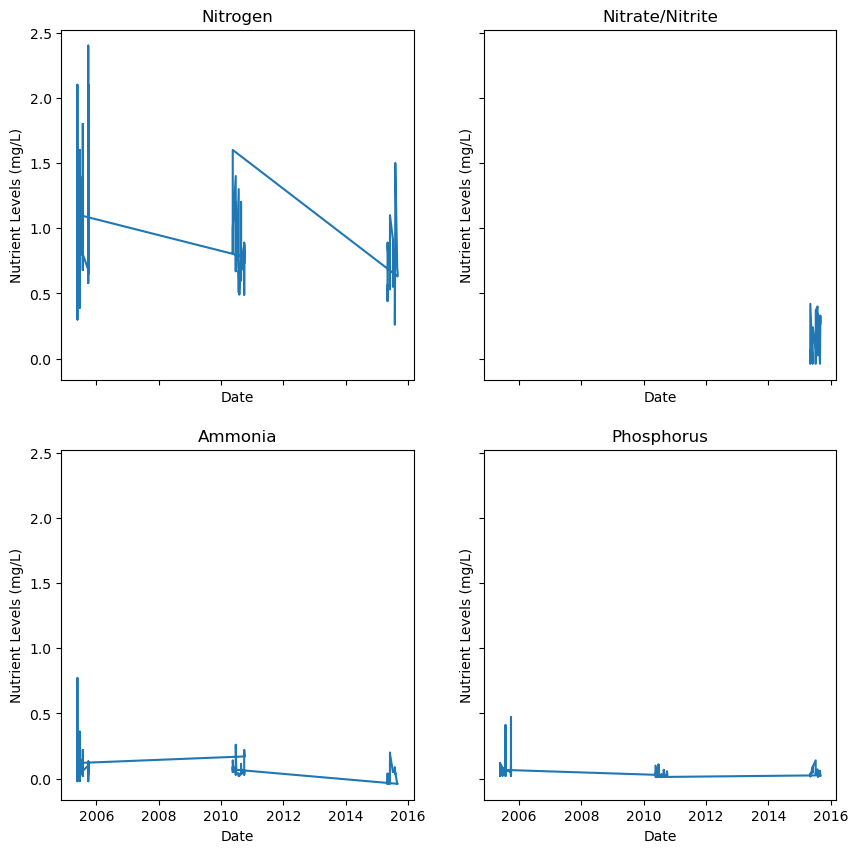

In [81]:
figure(GShawsheen,NShawsheen,AShawsheen,PShawsheen)

In most panels, there seems to be a general decline, though there are some peaks here and there. Nitrate and Nitrite, as we visualized on a large graph before, seems to have no trend among the data, as the data jumps around from high to low. 

### Neponset

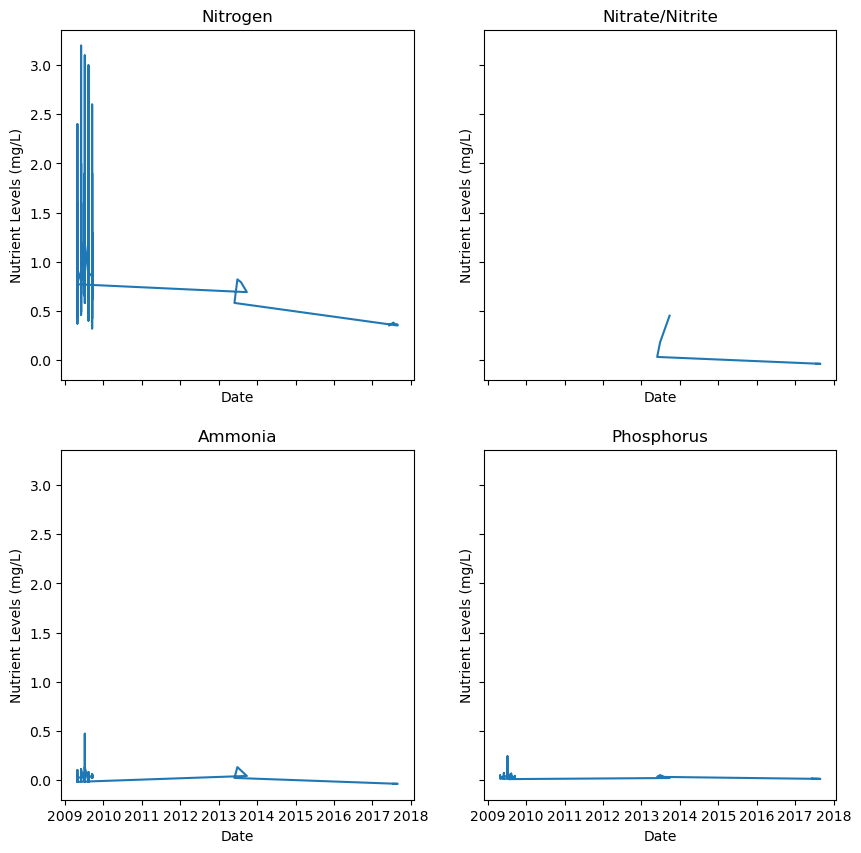

In [80]:
figure(GNeponset,NNeponset,ANeponset,PNeponset)

These graphs continue to look odd, especially Nitrogen (and this seems to be a trend among nitrogen levels at all the watersheds we're looking at) but the general trend continues to be a decline in nutrient levels over time, which is not the result we were expecting. However, we must still conduct a hypothesis test to draw any conclusions. 

### Charles

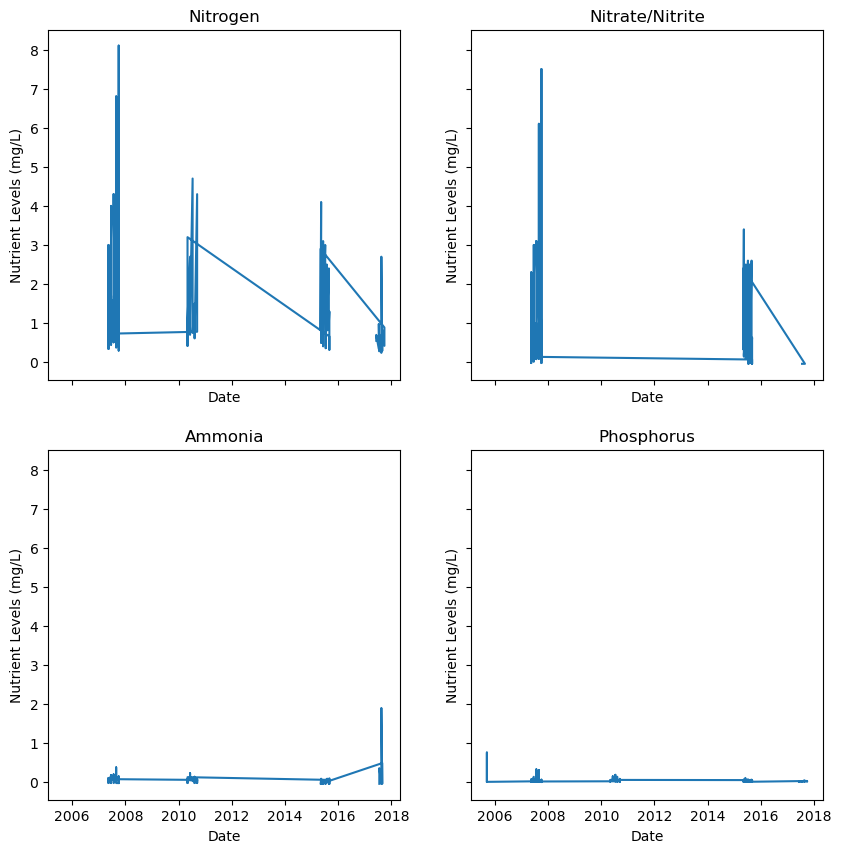

In [79]:
figure(GCharles,NCharles,ACharles,PCharles)

The Nitrogen and Nitrate/Nitrite graphs here definitely warrant a closer look in the future. At this site, the trend of decline seems to be broken a bit. Ammonia levels show a slight increase to a sharp peak, which Nitrogen and Nitrite levels seem to record a sudden spike of high levels until a decline after a long period of time. This difference might have to do with the location of the Charles sampling site, which we can get a closer look at when we pinpoint each site and urban farm on a map of the local waterways. 

### Hypothesis Test

As our project analyzes data collected over time, we will likely be using a time-series analysis for our hypothesis test. However, I'm not sure if it would apply due to the intermittent and random-interval nature of the collected data. 